<a href="https://colab.research.google.com/github/rexremigius/Machine-Learning/blob/main/HeartDisease_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini Project - Heart Disease detection using Logistic Regression 



**Importing datasets and visualizing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
link='/content/drive/MyDrive/MLdatasets/heart (1).csv'
data=pd.read_csv(link)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

**Percentage of Patients**

In [ ]:
countNoDisease = len(data[data.target== 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


**Relation between Age and Disease**

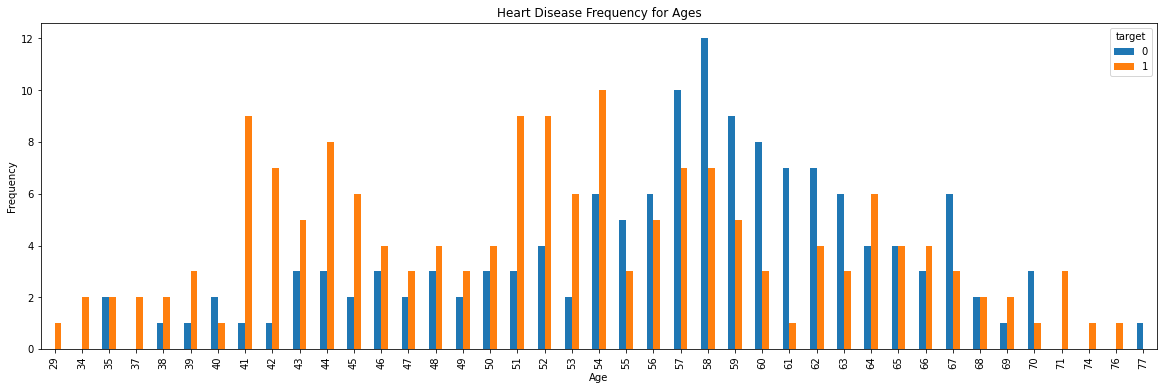

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('heartDiseaseAndAges.png')
plt.show()

**Finding Mean of values**

In [ ]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


**Plotting Graph between age and Slope(ST segment)**

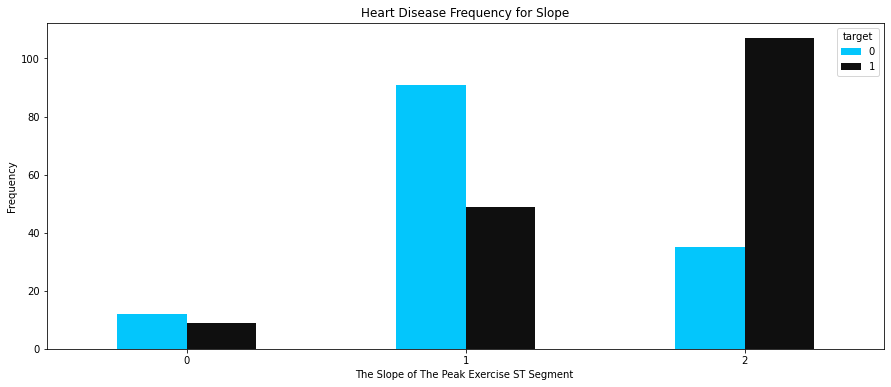

In [91]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#03C6FC','#0F0F0F' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Plotting graph for Logistic Regression**

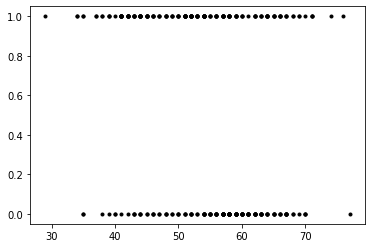

In [92]:
plt.scatter(data.age,data.target,marker=".",color='black')

**Training the datasets using sklearn**

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['age']],data.target,train_size=0.2)
X_test

,age
50,51
241,59
36,54
29,53
286,59
...,...
104,50
109,50
85,67
135,49


**Accuracy of Logistic Regression**

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
accuracies = {}
lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))
print("Error Rate {:.2f}%".format(100-acc))

Test Accuracy 61.73%
Error Rate 38.27%


**Confusion Matrix**

In [116]:
from sklearn.metrics import confusion_matrix
y_head_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test,y_head_lr)
y_predicted = lr.predict(X_test)
lr.predict_proba(X_test)
lr.predict(X_test)
print("Confusion Matrix:",cm_lr)

Confusion Matrix: [[71 37]
 [56 79]]


**Function for predicting the Disease**

In [100]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
def prediction_function(age):
    z = 0.042 * age - 1.53
    y = sigmoid(z)
    if(y>=0.5 and y<0.8):
      print("Prone to heart disease")    
    elif(y>0.8):
        print("Very prone to heart Disease")
    elif(y>0.3 and y<0.5):
        print("Less prone to heart Disease")
    else:
        print("Very Less prone to Heart Disease")
age =80
prediction_function(age)


Very prone to heart Disease
